# Chapter 5: Modeling distributions

In [1]:
from os.path import basename, exists


def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve

        local, _ = urlretrieve(url, filename)
        print("Downloaded " + local)


download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/thinkstats2.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/thinkplot.py")

In [2]:
import numpy as np

import thinkstats2
import thinkplot

## Reading

Exponential distribution:

In [4]:
?thinkstats2.RenderExpoCdf

Signature: thinkstats2.RenderExpoCdf(lam, low, high, n=101)
Docstring:
Generates sequences of xs and ps for an exponential CDF.

lam: parameter
low: float
high: float
n: number of points to render

returns: numpy arrays (xs, ps)
File:      ~/git/2022-summer-homeschool/thinkstats2/thinkstats2.py
Type:      function


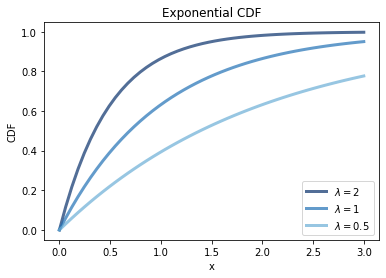

In [3]:
thinkplot.PrePlot(3)
for lam in [2.0, 1, 0.5]:
    xs, ps = thinkstats2.RenderExpoCdf(lam, 0, 3.0, 50)
    label = r"$\lambda=%g$" % lam
    thinkplot.Plot(xs, ps, label=label)

thinkplot.Config(title="Exponential CDF", xlabel="x", ylabel="CDF", loc="lower right")

In [5]:
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/nsfg.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/analytic.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/babyboom.dat")

Downloaded analytic.py
Downloaded babyboom.dat


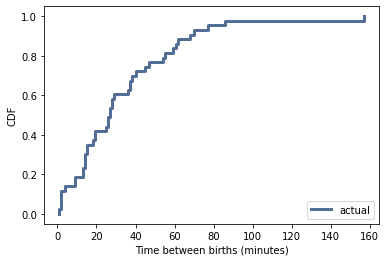

In [6]:
import analytic

df = analytic.ReadBabyBoom()
diffs = df.minutes.diff()
cdf = thinkstats2.Cdf(diffs, label="actual")

thinkplot.Cdf(cdf)
thinkplot.Config(xlabel="Time between births (minutes)", ylabel="CDF")

In [7]:
df.head()

,time,sex,weight_g,minutes
0,5,1,3837,5
1,104,1,3334,64
2,118,2,3554,78
3,155,2,3838,115
4,257,2,3625,177


In [8]:
diffs.head()

0     NaN
1    59.0
2    14.0
3    37.0
4    62.0
Name: minutes, dtype: float64

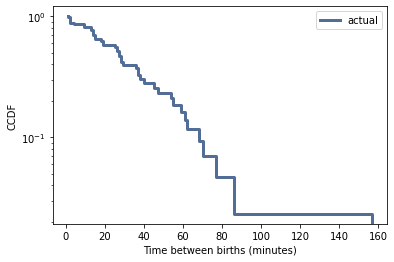

In [9]:
thinkplot.Cdf(cdf, complement=True)
thinkplot.Config(
    xlabel="Time between births (minutes)",
    ylabel="CCDF",
    yscale="log",
    loc="upper right",
)

Normal distribution:

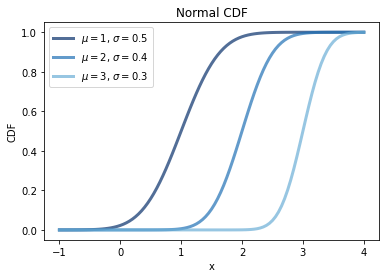

In [10]:
thinkplot.PrePlot(3)

mus = [1.0, 2.0, 3.0]
sigmas = [0.5, 0.4, 0.3]
for mu, sigma in zip(mus, sigmas):
    xs, ps = thinkstats2.RenderNormalCdf(mu=mu, sigma=sigma, low=-1.0, high=4.0)
    label = r"$\mu=%g$, $\sigma=%g$" % (mu, sigma)
    thinkplot.Plot(xs, ps, label=label)

thinkplot.Config(title="Normal CDF", xlabel="x", ylabel="CDF", loc="upper left")

In [11]:
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/nsfg.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/first.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/2002FemPreg.dct")
download(
    "https://github.com/AllenDowney/ThinkStats2/raw/master/code/2002FemPreg.dat.gz"
)

In [12]:
import nsfg
import first

In [13]:
preg = nsfg.ReadFemPreg()
weights = preg.totalwgt_lb.dropna()

In [14]:
# estimate parameters: trimming outliers yields a better fit
mu, var = thinkstats2.TrimmedMeanVar(weights, p=0.01)
print("Mean, Var", mu, var)

Mean, Var 7.280883100022579 1.545212570354488


In [15]:
?thinkstats2.TrimmedMeanVar

Signature: thinkstats2.TrimmedMeanVar(t, p=0.01)
Docstring:
Computes the trimmed mean and variance of a sequence of numbers.

Side effect: sorts the list.

Args:
    t: sequence of numbers
    p: fraction of values to trim off each end

Returns:
    float
File:      ~/git/2022-summer-homeschool/thinkstats2/thinkstats2.py
Type:      function


Sigma 1.2430657948614336


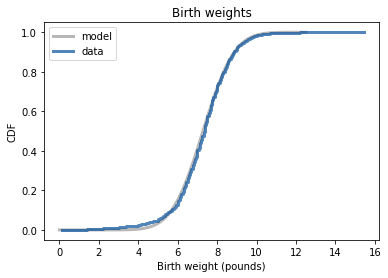

In [16]:
# plot the model
sigma = np.sqrt(var)
print("Sigma", sigma)
xs, ps = thinkstats2.RenderNormalCdf(mu, sigma, low=0, high=12.5)

thinkplot.Plot(xs, ps, label="model", color="0.6")

# plot the data
cdf = thinkstats2.Cdf(weights, label="data")

thinkplot.PrePlot(1)
thinkplot.Cdf(cdf)
thinkplot.Config(title="Birth weights", xlabel="Birth weight (pounds)", ylabel="CDF")

Normal probability plot:

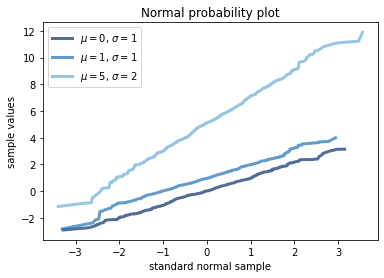

In [17]:
n = 1000
thinkplot.PrePlot(3)

mus = [0, 1, 5]
sigmas = [1, 1, 2]

for mu, sigma in zip(mus, sigmas):
    sample = np.random.normal(mu, sigma, n)
    xs, ys = thinkstats2.NormalProbability(sample)
    label = "$\mu=%d$, $\sigma=%d$" % (mu, sigma)
    thinkplot.Plot(xs, ys, label=label)

thinkplot.Config(
    title="Normal probability plot",
    xlabel="standard normal sample",
    ylabel="sample values",
)

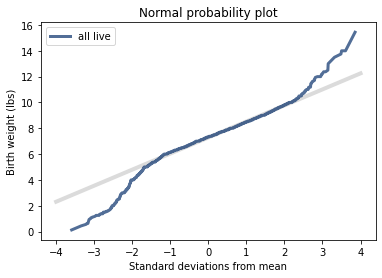

In [18]:
mean, var = thinkstats2.TrimmedMeanVar(weights, p=0.01)
std = np.sqrt(var)

xs = [-4, 4]
fxs, fys = thinkstats2.FitLine(xs, mean, std)
thinkplot.Plot(fxs, fys, linewidth=4, color="0.8")

xs, ys = thinkstats2.NormalProbability(weights)
thinkplot.Plot(xs, ys, label="all live")

thinkplot.Config(
    title="Normal probability plot",
    xlabel="Standard deviations from mean",
    ylabel="Birth weight (lbs)",
)

Is the deviation in the left tail due to pre-term babies?

In [19]:
full_term = preg[preg.prglngth >= 37]
term_weights = full_term.totalwgt_lb.dropna()

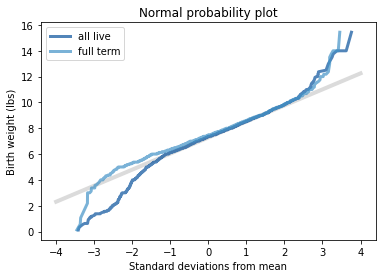

In [20]:
mean, var = thinkstats2.TrimmedMeanVar(weights, p=0.01)
std = np.sqrt(var)

xs = [-4, 4]
fxs, fys = thinkstats2.FitLine(xs, mean, std)
thinkplot.Plot(fxs, fys, linewidth=4, color="0.8")

thinkplot.PrePlot(2)
xs, ys = thinkstats2.NormalProbability(weights)
thinkplot.Plot(xs, ys, label="all live")

xs, ys = thinkstats2.NormalProbability(term_weights)
thinkplot.Plot(xs, ys, label="full term")
thinkplot.Config(
    title="Normal probability plot",
    xlabel="Standard deviations from mean",
    ylabel="Birth weight (lbs)",
)

Lognormal model:

In [21]:
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/brfss.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/CDBRFS08.ASC.gz")

Downloaded brfss.py
Downloaded CDBRFS08.ASC.gz


In [22]:
import brfss

df = brfss.ReadBrfss()
weights = df.wtkg2.dropna()

In [23]:
def MakeNormalModel(weights):
    """
    Plots a CDF with a normal model.
    `weights`: sequence
    """
    
    cdf = thinkstats2.Cdf(weights, label="weights")
    
    mean, var = thinkstats2.TrimmedMeanVar(weights)
    std = np.sqrt(var)
    print(f"n, mean, std: {len(weights)}, {mean}, {std}")
    
    # x range for plot
    xmin = mean - 4 * std
    xmax = mean + 4 * std
    
    xs, ps = thinkstats2.RenderNormalCdf(mean, std, xmin, xmax)
    thinkplot.Plot(xs, ps, label='model', linewidth=4, color='0.8')
    thinkplot.Cdf(cdf)

n, mean, std: 398484, 78.59599565702814, 17.754555191798296


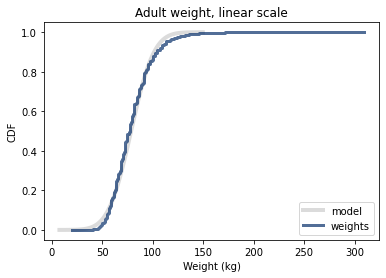

In [26]:
MakeNormalModel(weights)
thinkplot.Config(
    title="Adult weight, linear scale",
    xlabel="Weight (kg)",
    ylabel="CDF",
    loc="lower right",
)

The normal model does not fit adult weights very well.

n, mean, std: 398484, 1.884660713731975, 0.0962358025915174


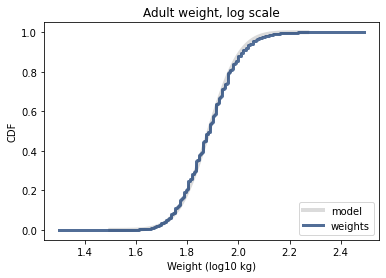

In [28]:
log_weights = np.log10(weights)
MakeNormalModel(log_weights)
thinkplot.Config(
    title="Adult weight, log scale",
    xlabel="Weight (log10 kg)",
    ylabel="CDF",
    loc="lower right",
)

The log-normal model fits better.

In [29]:
def MakeNormalPlot(weights):
    """
    Generates a normal probability plot of weights.
    `weights`: sequence
    """
    
    mean, var = thinkstats2.TrimmedMeanVar(weights, p=0.01)
    std = np.sqrt(var)
    
    xs = [-5, 5]
    xs, ys = thinkstats2.FitLine(xs, mean, std)
    thinkplot.Plot(xs, ys, color='0.8', label='model')
    
    xs, ys = thinkstats2.NormalProbability(weights)
    thinkplot.Plot(xs, ys, label="weights")

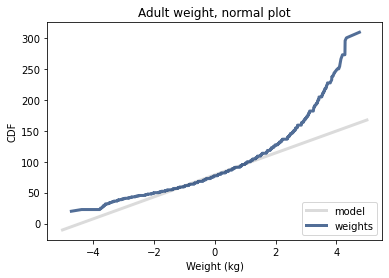

In [31]:
MakeNormalPlot(weights)
thinkplot.Config(
    title="Adult weight, normal plot",
    xlabel="Weight (kg)",
    ylabel="CDF",
    loc="lower right",
)

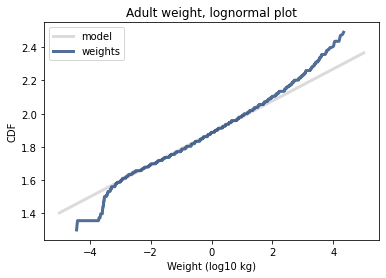

In [32]:
MakeNormalPlot(log_weights)
thinkplot.Config(
    title="Adult weight, lognormal plot",
    xlabel="Weight (log10 kg)",
    ylabel="CDF",
    loc="upper left",
)

Pareto distribution:

/Users/lealia/git/2022-summer-homeschool/thinkstats2/thinkstats2.py:2157: RuntimeWarning: invalid value encountered in reciprocal
  ps = 1 - (xs / xmin) ** -alpha


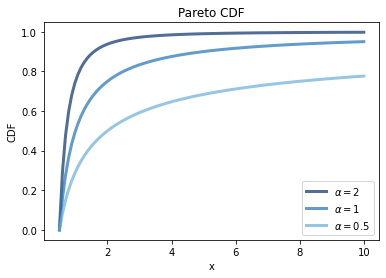

In [33]:
xmin = 0.5

thinkplot.PrePlot(3)
for alpha in [2.0, 1.0, 0.5]:
    xs, ps = thinkstats2.RenderParetoCdf(xmin, alpha, 0, 10.0, n=100)
    thinkplot.Plot(xs, ps, label=r"$\alpha=%g$" % alpha)

thinkplot.Config(title="Pareto CDF", xlabel="x", ylabel="CDF", loc="lower right")

In [34]:
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/populations.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/PEP_2012_PEPANNRES_with_ann.csv")

Downloaded populations.py
Downloaded PEP_2012_PEPANNRES_with_ann.csv


In [35]:
import populations

pops = populations.ReadData()
print("Number of cities/towns", len(pops))

Number of cities/towns 19515


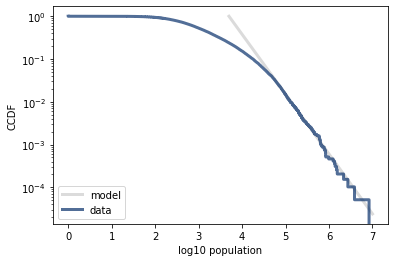

In [36]:
log_pops = np.log10(pops)
cdf = thinkstats2.Cdf(pops, label="data")
cdf_log = thinkstats2.Cdf(log_pops, label="data")

# pareto plot
xs, ys = thinkstats2.RenderParetoCdf(xmin=5000, alpha=1.4, low=0, high=1e7)
thinkplot.Plot(np.log10(xs), 1 - ys, label="model", color="0.8")

thinkplot.Cdf(cdf_log, complement=True)
thinkplot.Config(
    xlabel="log10 population", ylabel="CCDF", yscale="log", loc="lower left"
)

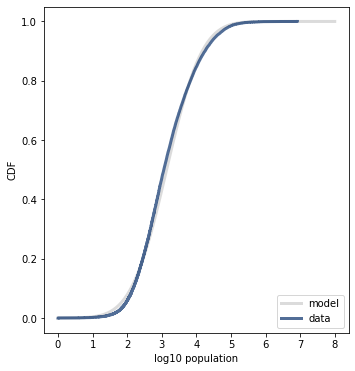

In [37]:
thinkplot.PrePlot(cols=2)

mu, sigma = log_pops.mean(), log_pops.std()
xs, ps = thinkstats2.RenderNormalCdf(mu, sigma, low=0, high=8)
thinkplot.Plot(xs, ps, label="model", color="0.8")

thinkplot.Cdf(cdf_log)
thinkplot.Config(xlabel="log10 population", ylabel="CDF", loc="lower right")

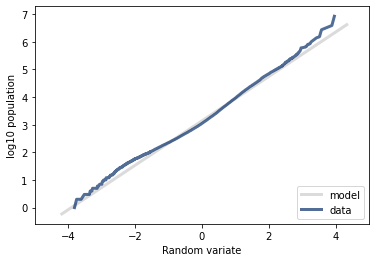

In [38]:
thinkstats2.NormalProbabilityPlot(log_pops, label="data")
thinkplot.Config(xlabel="Random variate", ylabel="log10 population", xlim=[-5, 5])

Random variates:

In [40]:
import random

def expovariate(lam):
    p = random.random()
    x = -np.log(1 - p) / lam
    return x

In [41]:
t = [expovariate(lam=2) for _ in range(1000)]

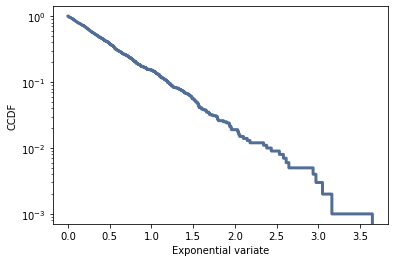

In [42]:
cdf = thinkstats2.Cdf(t)

thinkplot.Cdf(cdf, complement=True)
thinkplot.Config(xlabel="Exponential variate", ylabel="CCDF", yscale="log")

## Exercises

**Exercise:** Write a function that generates a Pareto variate. Generate a sample and plot its complementary CDF on a log-log scale. Does it look like a straight line?

In [43]:
def pareto_variate(alpha, xm):
    p = random.random()
    x = (1 - p)**(-1 / alpha) * xm
    return x

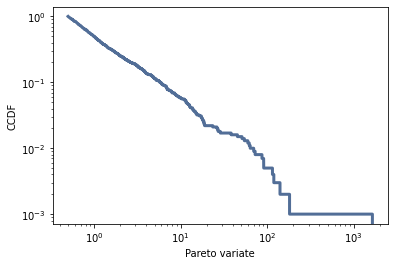

In [45]:
t = [pareto_variate(alpha=1, xm=0.5) for _ in range(1000)]

cdf = thinkstats2.Cdf(t)

thinkplot.Cdf(cdf, complement=True)
thinkplot.Config(xlabel="Pareto variate", ylabel="CCDF", xscale="log", yscale="log")

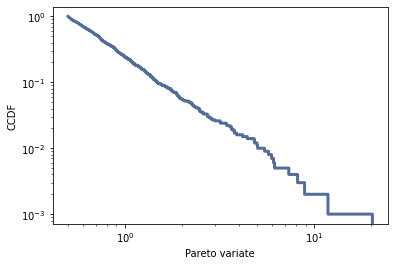

In [46]:
t = [pareto_variate(alpha=2, xm=0.5) for _ in range(1000)]

cdf = thinkstats2.Cdf(t)

thinkplot.Cdf(cdf, complement=True)
thinkplot.Config(xlabel="Pareto variate", ylabel="CCDF", xscale="log", yscale="log")

**Exercise:** In the BRFSS (see Section 5.4), the distribution of heights is roughly normal with parameters µ = 178 cm and σ = 7.7 cm for men, and µ = 163 cm and σ = 7.3 cm for women.

In order to join Blue Man Group, you have to be male between 5’10” and 6’1” (see http://bluemancasting.com). What percentage of the U.S. male population is in this range? Hint: use `scipy.stats.norm.cdf`.

In [49]:
import scipy.stats

In [50]:
mu = 178 #cm
sigma = 7.7 #cm
dist = scipy.stats.norm(loc=mu, scale=sigma)
type(dist)

scipy.stats._distn_infrastructure.rv_frozen

In [51]:
dist.mean(), dist.std()

(178.0, 7.7)

In [52]:
dist.cdf(mu - sigma)

0.1586552539314574

16% of people are below the mean by more than one standard deviation.

How many people are between 5'10" and 6'1"?

In [53]:
def feet_and_inches_to_cm(feet, inches):
    """
    Convert height in feet and inches to cm.
    """
    inches += feet * 12
    cm = inches * 2.54
    
    return cm

In [54]:
# people below 5'10"
below_5_10 = dist.cdf(feet_and_inches_to_cm(5, 10))

# people below 6'1"
below_6_1 = dist.cdf(feet_and_inches_to_cm(6, 1))

# between 5'10" and 6'1"
below_6_1 - below_5_10

0.34274683763147457

About 34% of people are between 5'10" and 6'1".

**Exercise:** To get a feel for the Pareto distribution, let’s see how different the world would be if the distribution of human height were Pareto. With the parameters xm = 1 m and α = 1.7, we get a distribution with a reasonable minimum, 1 m, and median, 1.5 m.

Plot this distribution. What is the mean human height in Pareto world? What fraction of the population is shorter than the mean? If there are 7 billion people in Pareto world, how many do we expect to be taller than 1 km? How tall do we expect the tallest person to be?

`scipy.stats.pareto` represents a pareto distribution.  In Pareto world, the distribution of human heights has parameters alpha=1.7 and xmin=1 meter.  So the shortest person is 100 cm and the median is 150.

In [55]:
alpha = 1.7
xmin = 1  # meter
dist = scipy.stats.pareto(b=alpha, scale=xmin)
dist.median()

1.5034066538560549

The median height is 1.5 m

In [56]:
dist.mean()

2.428571428571429

The mean height is 2.4 m

In [57]:
dist.cdf(dist.mean())

0.778739697565288

78% of people are shorter than the mean

In [64]:
dist.sf(1000) * 7000000000

55602.97643069972

55,603 people are greater than 1 km in height!

In [66]:
dist.ppf(1 - 1/7e9)

618349.6106759505

In [63]:
scipy.stats.pareto?

Signature:       scipy.stats.pareto(*args, **kwds)
Type:            pareto_gen
String form:     <scipy.stats._continuous_distns.pareto_gen object at 0x7fc128190a90>
File:            ~/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py
Docstring:      
A Pareto continuous random variable.

As an instance of the `rv_continuous` class, `pareto` object inherits from it
a collection of generic methods (see below for the full list),
and completes them with details specific for this particular distribution.

Methods
-------
rvs(b, loc=0, scale=1, size=1, random_state=None)
    Random variates.
pdf(x, b, loc=0, scale=1)
    Probability density function.
logpdf(x, b, loc=0, scale=1)
    Log of the probability density function.
cdf(x, b, loc=0, scale=1)
    Cumulative distribution function.
logcdf(x, b, loc=0, scale=1)
    Log of the cumulative distribution function.
sf(x, b, loc=0, scale=1)
    Survival function  (also defined as ``1 - cdf``, but `sf` is sometimes more 